# Question 6

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

> ### Histogram Equalization

In [2]:
def histEqualization(img):
    colors, counts = np.unique(img.flatten(), return_counts=True, axis=0)
    sort_ind = np.argsort(colors)
    cdf_min = counts[sort_ind[0]]
    total = (img.shape[0]*img.shape[1])
    cdf = np.zeros((1,256))
    
    colors = colors[np.newaxis, :]
    counts = counts[np.newaxis, :]
    np.put(cdf, colors, counts)
    
    cdf = np.cumsum(cdf)
    return np.uint8(np.round(255*((cdf[img]-cdf_min)/(total - cdf_min))))


> ### Histogram Matching

In [3]:
def histMatching(src, ref):
    s_colors, s_counts = np.unique(src.flatten(), return_counts=True, axis=0)
    r_colors, r_counts = np.unique(ref.flatten(), return_counts=True, axis=0)
    s_cdf = np.zeros((1,256))
    r_cdf = np.zeros((1,256))

    s_colors = s_colors[np.newaxis, :]
    s_counts = s_counts[np.newaxis, :]
    
    r_colors = r_colors[np.newaxis, :]
    r_counts = r_counts[np.newaxis, :]
    
    np.put(s_cdf, s_colors, s_counts)
    np.put(r_cdf, r_colors, r_counts)
    
    s_cdf = np.round(255*(np.cumsum(s_cdf)/(src.shape[0]*src.shape[1])))
    r_cdf = np.round(255*(np.cumsum(r_cdf)/(ref.shape[0]*ref.shape[1])))
    
    t_map = np.zeros((1,256))
    for i in range(256):
        diff_arr = r_cdf - s_cdf[i]
        bool_arr = np.where(diff_arr <= -1, True, False)
        if np.all(bool_arr) == True:
            t_map[0][i] = np.argmin((np.abs(diff_arr)), axis = 0)
        else:
            t_map[0][i] = np.argmin(np.ma.masked_array(diff_arr, bool_arr))
    func = np.vectorize(lambda x : t_map[0][x])
    return np.uint8(func(src))

In [4]:
def compareWithHist(im):
    _, images = plt.subplots(1,2, figsize = (20,20))
    images[0].imshow(im, cmap = 'gray', vmin = 0, vmax = 255)
    images[0].set_title('original')
    images[1].imshow(histEqualization(im), cmap = 'gray', vmin = 0, vmax = 255)
    images[1].set_title('histogram equalized')
    plt.show()

## Perfect case for histogram equalization
> The image has most of its intensity values in a small range. Thus the histogram equalized image show great improvement as more details can be seen clearly

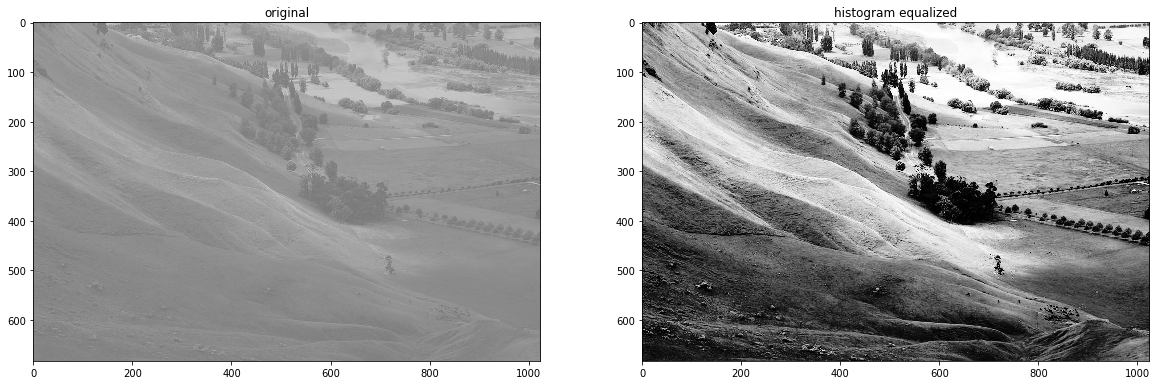

In [5]:
im = cv.imread('./images/hist_choice.jpg', cv.IMREAD_GRAYSCALE)
compareWithHist(im)

## Another example
> Although histogram equalization brings out more details in the image (but certain boundaries get weaker), local histogram equalization can also be used for much better results 

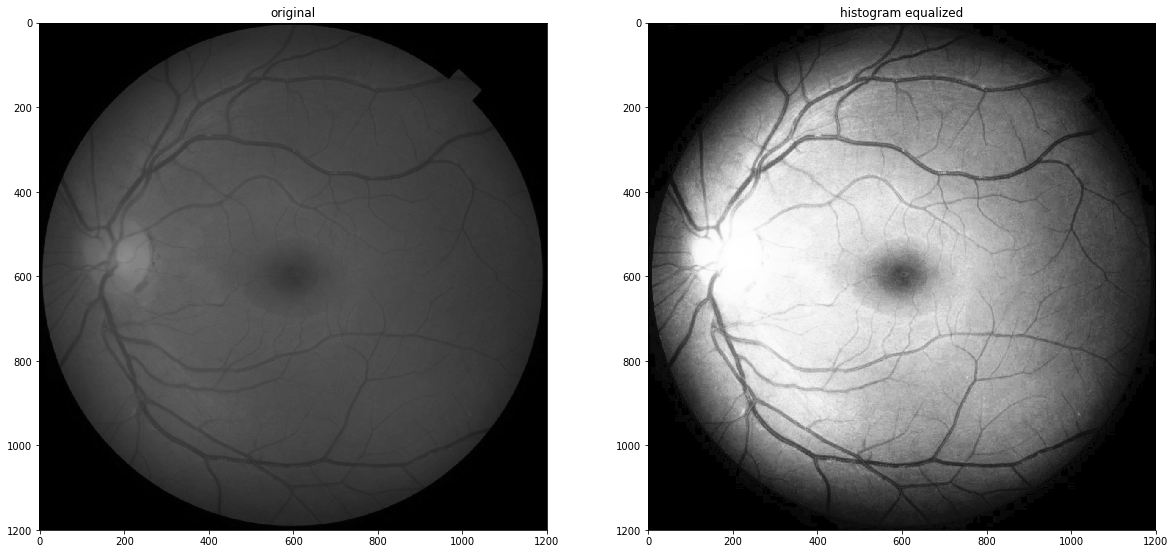

In [6]:
im = cv.imread('./images/eye.png', cv.IMREAD_GRAYSCALE)
compareWithHist(im)

## Where not to use histogram equalization ?
> In the example given below, the results are not good because the background dominates the object of interest(coins) in terms of frequency. Hence the background gets more representation in the output. Thus for such cases histogram equalization is not useful.

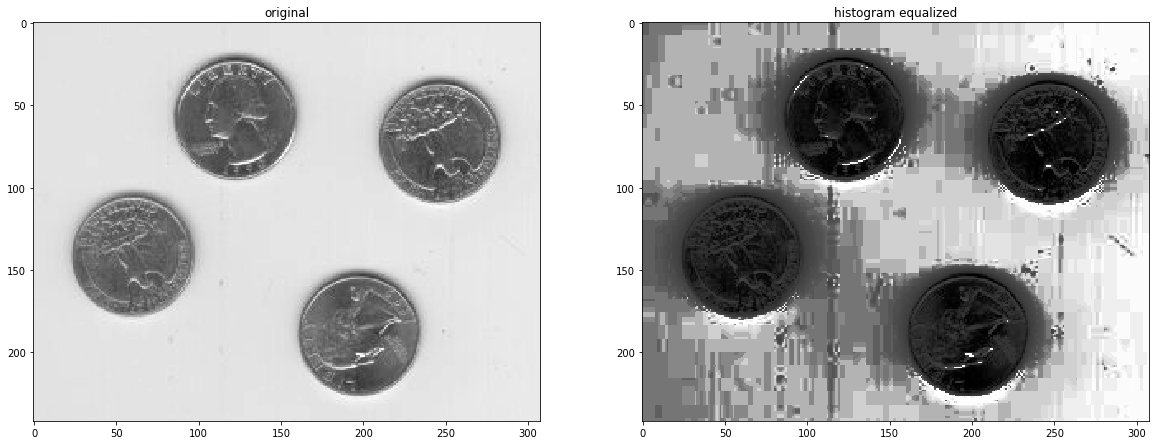

In [7]:
im = cv.imread('./images/hist_choicec2.jpg', cv.IMREAD_GRAYSCALE)
compareWithHist(im)

## Histogram matching example

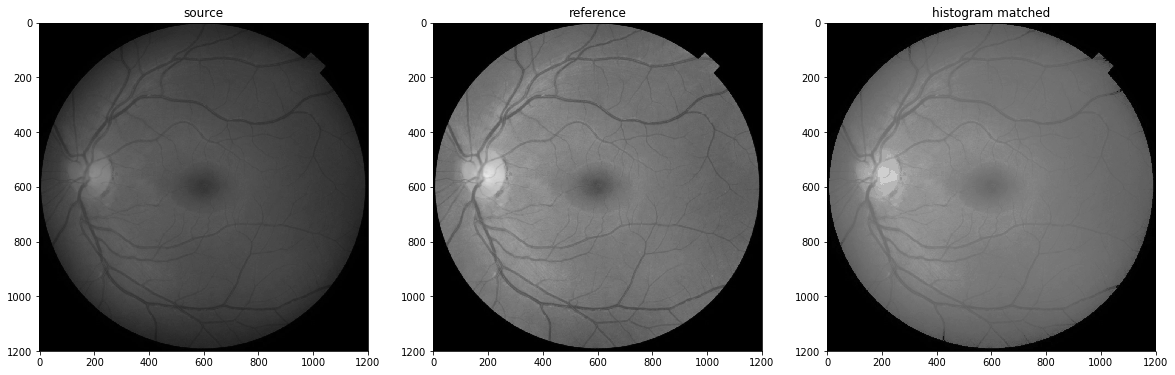

In [8]:
src = cv.imread('./images/eye.png', cv.IMREAD_GRAYSCALE)
ref = cv.imread('./images/eyeref.png', cv.IMREAD_GRAYSCALE)

_, images = plt.subplots(1,3, figsize = (20,20))
images[0].imshow(src, cmap = 'gray', vmin = 0, vmax = 255)
images[0].set_title('source')
images[1].imshow(ref, cmap = 'gray', vmin = 0, vmax = 255)
images[1].set_title('reference')
images[2].imshow(histMatching(src, ref), cmap = 'gray', vmin = 0, vmax = 255)
images[2].set_title('histogram matched')
plt.show()

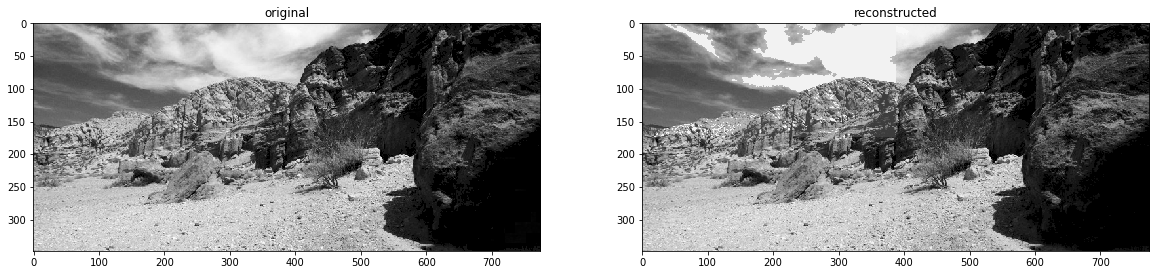

In [9]:
img = cv.imread('./images/canyon.png', cv.IMREAD_GRAYSCALE)

im1 = cv.imread('./images/part1.png', cv.IMREAD_GRAYSCALE)
im2 = cv.imread('./images/part2.png', cv.IMREAD_GRAYSCALE)
im3 = cv.imread('./images/part3.png', cv.IMREAD_GRAYSCALE)
im4 = cv.imread('./images/part4.png', cv.IMREAD_GRAYSCALE)

dim = im1.shape

res1 = histMatching(im1, img[0:dim[0]-1, 0:dim[1]-1])
res2 = histMatching(im2, img[0:dim[0],dim[1]-1:])
res3 = histMatching(im3, img[dim[0]:,0:dim[1]-1])
res4 = histMatching(im4, img[dim[0]:,dim[1]:])

out1 = np.hstack((res1,res2))
out2 = np.hstack((res3,res4))
out = np.vstack((out1,out2))
_, plots = plt.subplots(1, 2, figsize = (20,20))
plots[0].imshow(img, cmap = 'gray', vmin = 0, vmax = 255)
plots[0].set_title('original')
plots[1].imshow(out, cmap = 'gray', vmin = 0, vmax = 255)
plots[1].set_title('reconstructed')

plt.show()

### image reconstruction
- The histogram of given parts are matched with the histogram of corresponding parts in the original image